In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Step 1: Select a real-world dataset.



Select UCI wine quality dataset. It is a popular dataset used in machine learning and statistical analysis, consisting of two separate datasets for red and white wine samples. 

Step 2: Perform data preparation and cleaning

2.1 Load the dataset into Jupyter notebook

In [2]:
# Read the data
white_df = pd.read_csv('winequality-white.csv', sep=';')
red_df = pd.read_csv('winequality-red.csv', sep=';')

2.2 Explore the basic information about the data, e.g., size of data ranges, some basic statistics etc.

In [3]:
# Print data shape
print('white wine data shape:', white_df.shape)
print('red wine data shape:', red_df.shape)

white wine data shape: (4898, 12)
red wine data shape: (1599, 12)


In [4]:
# Print data info
print(white_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [5]:
print(red_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


The white wine dataset has 4898 rows and 12 columns, where 11 columns are float64 data type and 1 column is int64 data type. The red wine dataset has 1599 rows and 12 columns, where 11 columns are float64 data type and 1 column is int64 data type. Both datasets have the same number of columns, but the white wine dataset has significantly more samples than the red wine dataset.

Both datasets have no missing values, and the columns represent various chemical and physical properties of the wine. The quality column is the target variable, and the other columns are features that can be used to predict the quality of the wine.

2.3 Handle missing, incorrect and invalid data

In [27]:
# Check for missing values
white_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [3]:
red_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values in dataframes as all columns have 0 null values. The features in the dataset come from objective tests, so there are no invalid or incorrect values.

2.4 Perform any additional steps (parsing datas, feature engineering, create additional columns etc.)

In [7]:
# Merge the data
white_df['type'] = 'white'
red_df['type'] = 'red'

df = pd.concat([red_df, white_df], axis=0)

A new column named type is created in both dataframes with the respective values 'red' and 'white' and then these dataframes are concatenated.

Merging the data of red and white wine is done to create a larger and more diverse dataset that can improve the performance of machine learning models. Combining both datasets increases the number of samples, and thus can lead to more accurate predictions. Moreover, merging the data enables us to perform a more comprehensive analysis of wine properties and their effects on quality.

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


The new dataframe has 6497 rows and 13 columns, where 12 columns are float64 data type and 1 column is object data type.

Step 3: Perform exploratory analysis and visualization

3.1 Compute statistics for numeric columns

In [32]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


3.2 Explore distribution of numeric columns using histograms etc.

3.2.1 Histograms and boxplots of all numeric columns

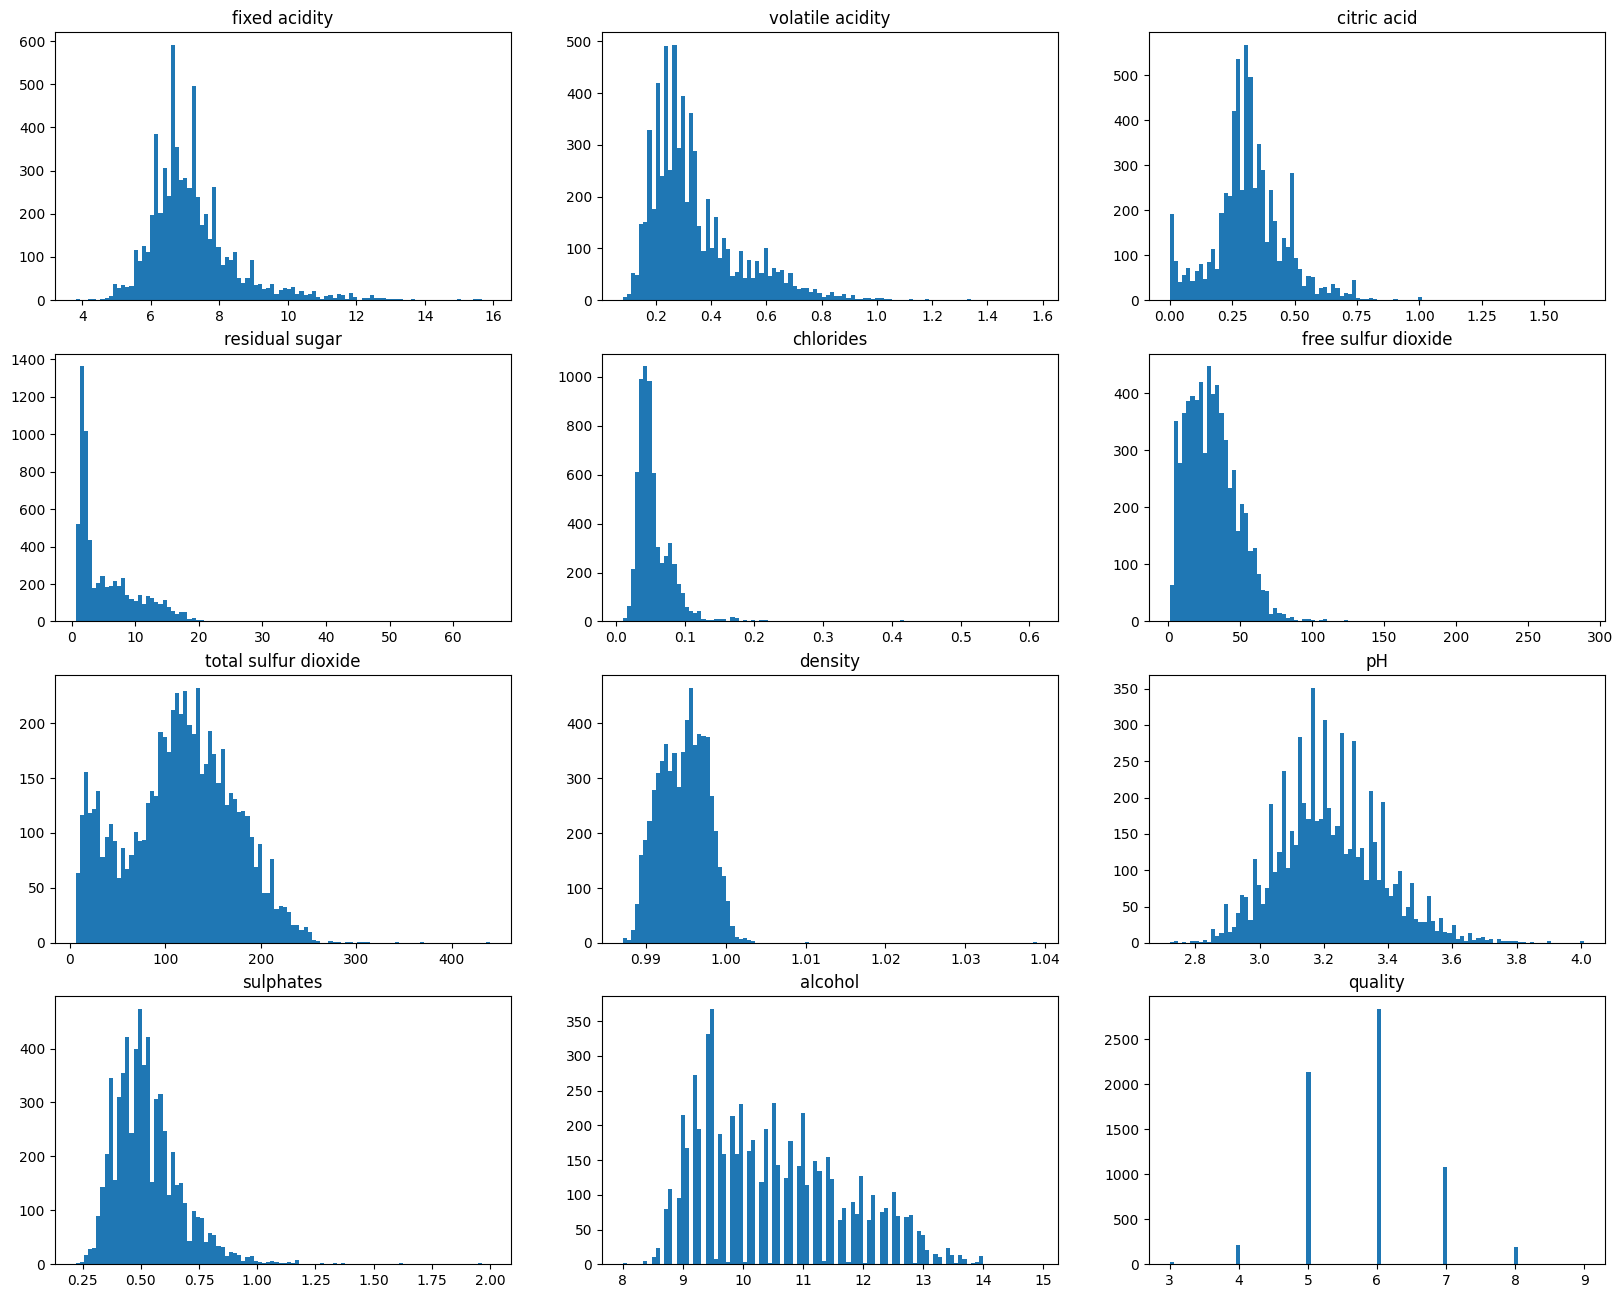

In [8]:
column = df.columns.tolist()

fig = plt.figure(figsize=(20,16))
for i in range(12):
    ax = fig.add_subplot(4, 3, i+1)
    ax.hist(df[column[i]],bins=100)
    ax.set_title(column[i])
plt.show()

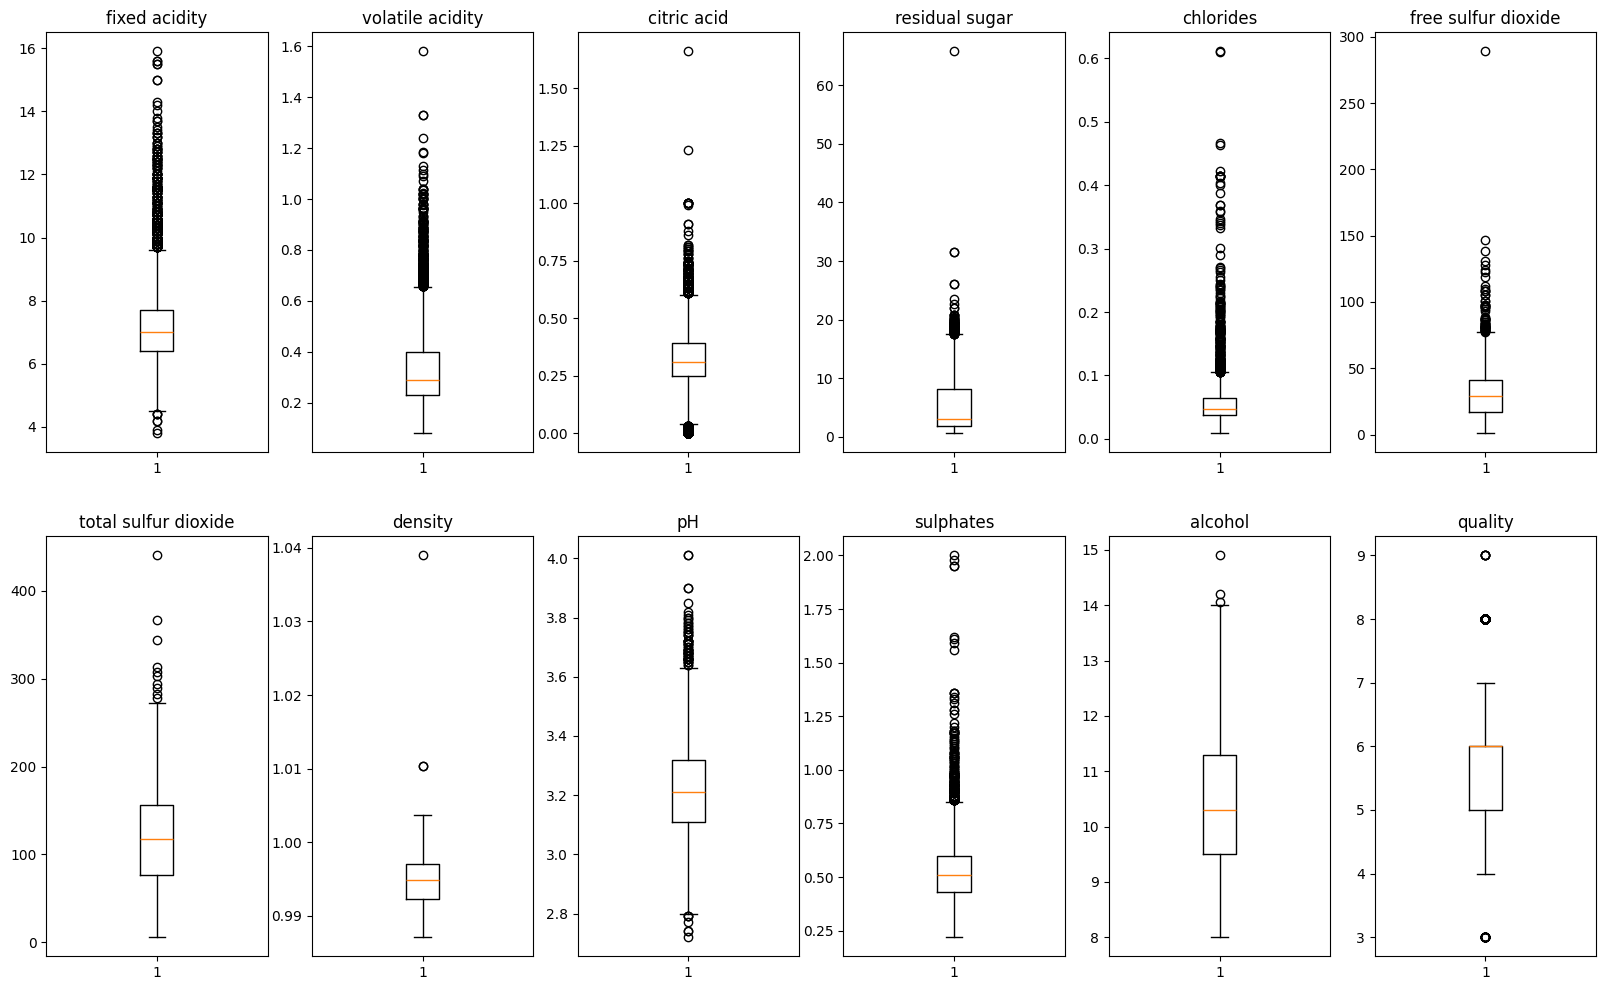

In [34]:
fig = plt.figure(figsize=(20,12))
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.boxplot(df[column[i]])
    ax.set_title(column[i])
plt.show()

Fixed acidity: The distribution of wines is skewed towards lower levels of fixed acidity.

Volatile acidity: Most of the wines have low levels of volatile acidity, with a few having very high levels.

Citric acid: The majority of wines have low to moderate levels of citric acid, with a few having higher levels.

Residual sugar: Most wines have low levels of residual sugar, with only a few having higher levels.

Chlorides: The distribution of chlorides is highly skewed towards lower levels, with only a few wines having higher levels.

Free sulfur dioxide: The majority of wines have low levels of free sulfur dioxide, with only a few having higher levels.

Total sulfur dioxide: The distribution of total sulfur dioxide is skewed towards higher levels, with only a few wines having lower levels.

Density: The distribution of wines by density is highly skewed towards lower levels, with only a few having higher densities.

pH: The majority of wines have pH levels in the range of 3 to 4, with only a few having levels outside this range.

Sulphates: Most wines have low to moderate levels of sulphates, with only a few having very high levels.

Alcohol: The majority of wines have an alcohol content between 9.0% and 12.5%.

Quality: The majority of wines in the dataset have a quality rating of 5 or 6.

3.2.2 Histograms of all numeric columns for different types of wine

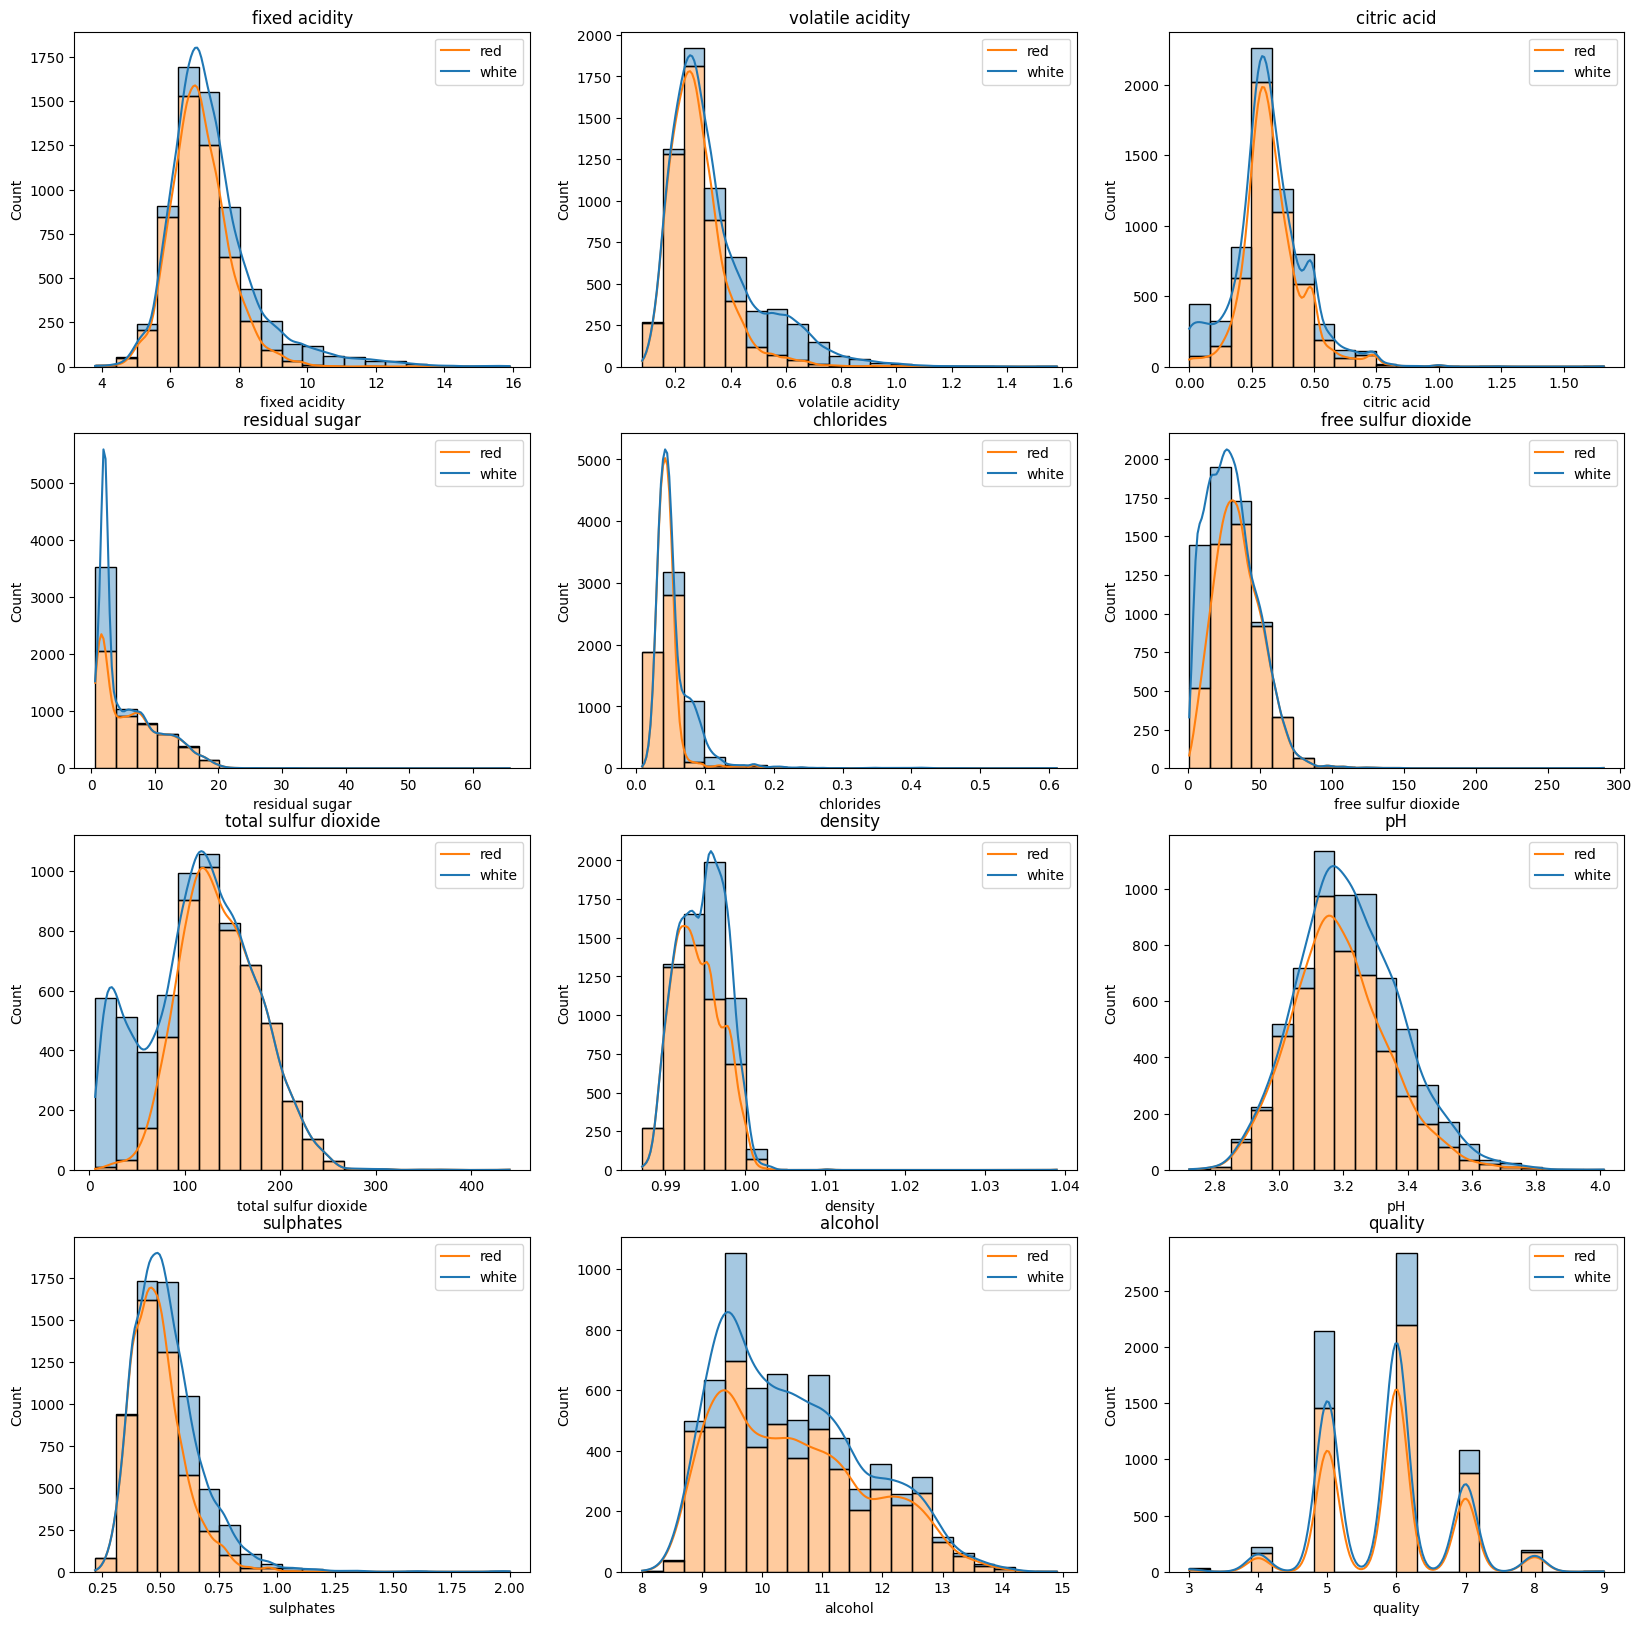

In [35]:
fig = plt.figure(figsize=(20,20))

for i in range(12):
    ax = fig.add_subplot(4,3,i+1)
    sns.histplot(data=df, x=column[i], hue='type', kde=True, alpha=0.4, bins=20, ax=ax, multiple='stack')
    plt.legend(['red', 'white'])
    ax.set_title(column[i])

plt.show()

3.2.3 Analysis of acid-related features

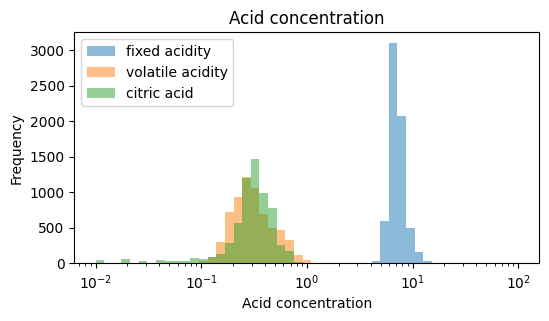

In [36]:
plt.figure(figsize=(6,3))

bins = 10**(np.linspace(-2,2))
plt.hist(df['fixed acidity'], bins=bins, alpha=0.5)
plt.hist(df['volatile acidity'], bins=bins, alpha=0.5)
plt.hist(df['citric acid'], bins=bins, alpha=0.5)

plt.xscale('log')
plt.xlabel('Acid concentration')
plt.ylabel('Frequency')
plt.title('Acid concentration')
plt.legend(['fixed acidity', 'volatile acidity', 'citric acid'])
plt.show()

Because the fixed acidity values span a relatively narrow range (between 3.8 and 15.9), while the volatile acidity values span a much wider range (between 0.08 and 1.58). By using a logarithmic scale, we can more easily see the differences between the values that might otherwise be hard to distinguish.

From the histograms of the acid-related features, we can see that the highest concentration is observed in fixed acidity, followed by citric acid and volatile acidity, respectively. The concentration of citric acid and volatile acidity is relatively similar compared to fixed acidity.

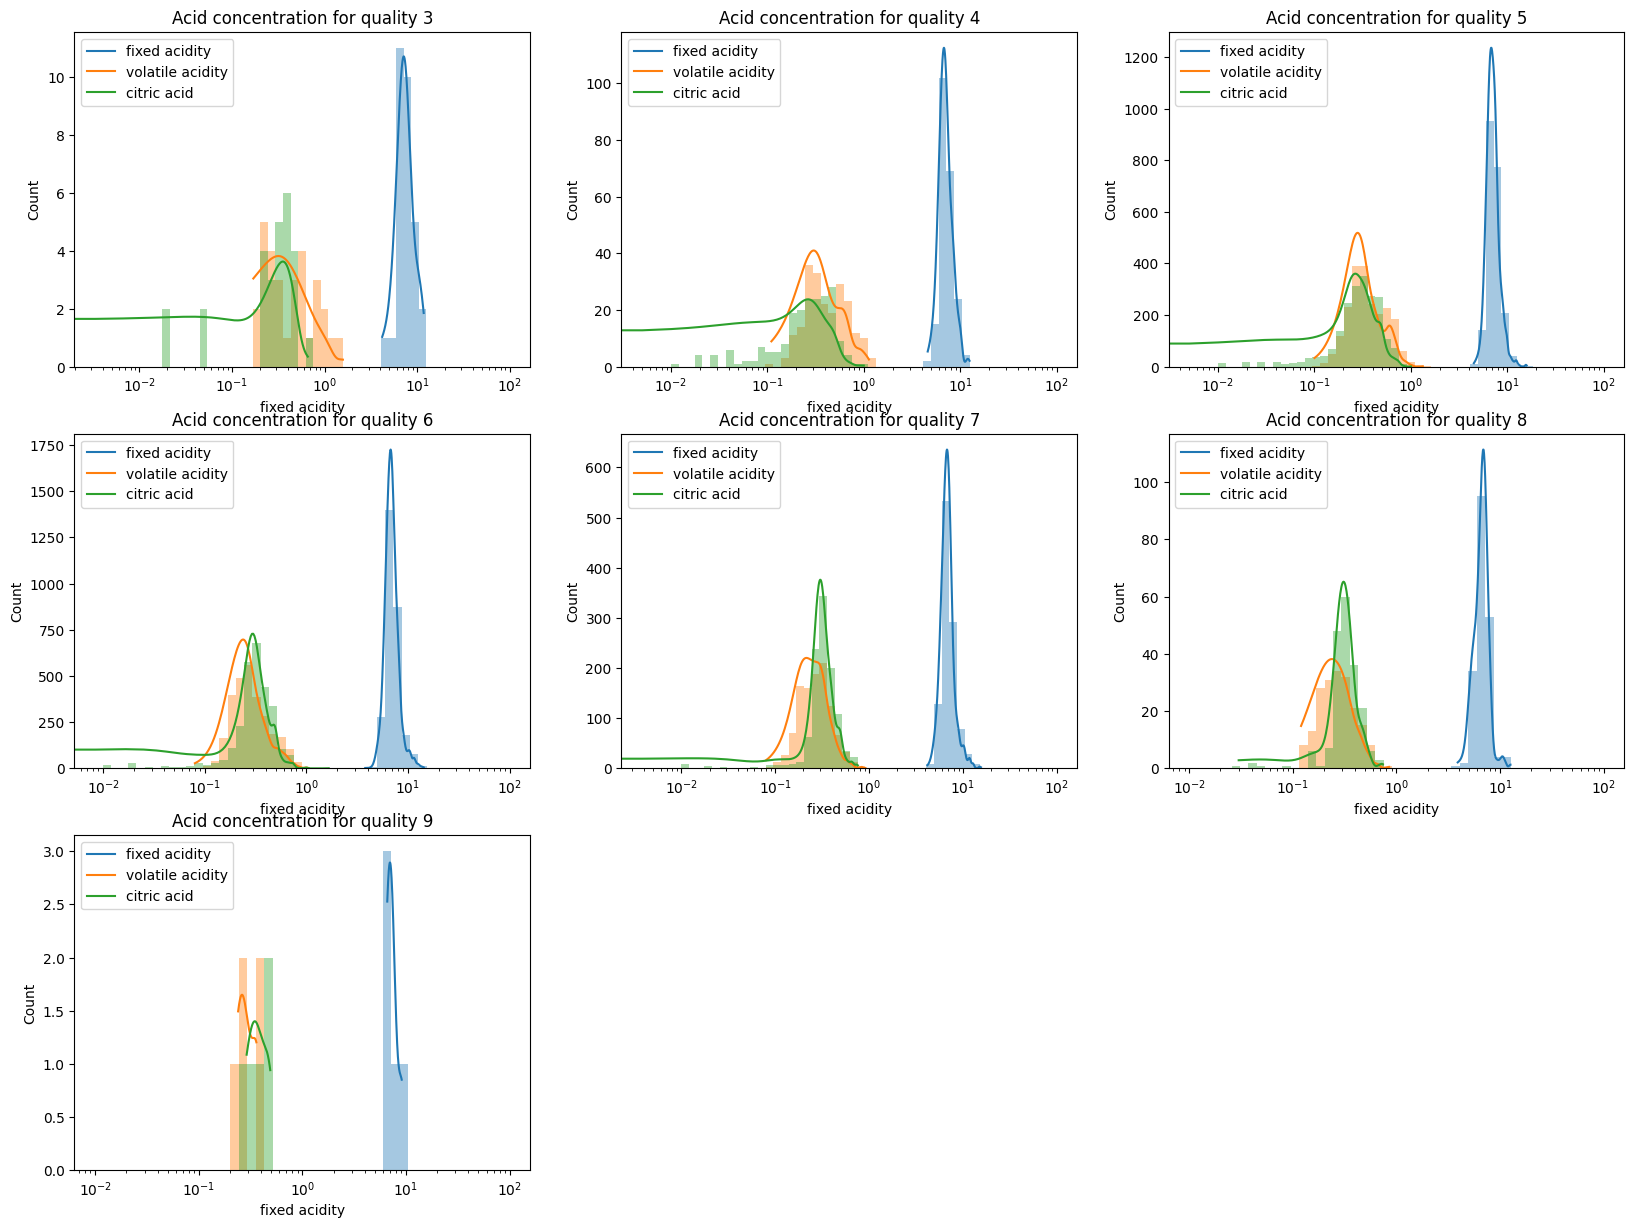

In [37]:
fig = plt.figure(figsize=(20,20))

for i in range(3, 10):
    ax = fig.add_subplot(4,3,i+1)
    sns.histplot(data=df[df['quality']==i], x='fixed acidity', ax=ax, bins=bins, kde=True, alpha=0.4)
    sns.histplot(data=df[df['quality']==i], x='volatile acidity', ax=ax, bins=bins, kde=True, alpha=0.4)
    sns.histplot(data=df[df['quality']==i], x='citric acid', ax=ax, bins=bins, kde=True, alpha=0.4,)
    plt.legend(['fixed acidity', 'volatile acidity', 'citric acid'])
    plt.xscale('log')
    ax.set_title('Acid concentration for quality {}'.format(i))

plt.show()

3.2.4 Analysis of sugar-related features

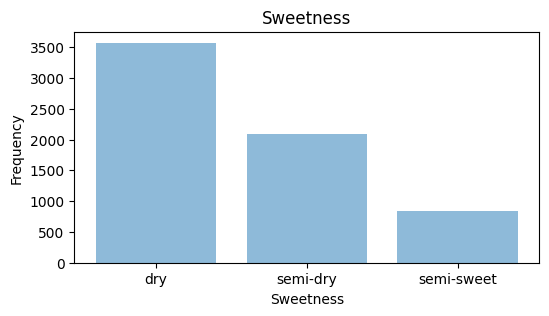

In [38]:
sweetness_df = pd.cut(df['residual sugar'], bins=[0,4,12,45], labels=['dry', 'semi-dry', 'semi-sweet'])

plt.figure(figsize=(6,3))
plt.bar(sweetness_df.value_counts().index, sweetness_df.value_counts(), alpha=0.5)
plt.xlabel('Sweetness')
plt.ylabel('Frequency')
plt.title('Sweetness')
plt.show()

From the histograms of the sugar-related characteristics, we can see that the most common type of wine in the dataset is "dry". This suggests that dry wines are more popular or more common than semi-dry or semi-sweet wines in the dataset. The second most common type of wine is "semi-dry". This indicates that semi-dry wines are also relatively common in the dataset. The least common type of wine is "semi-sweet". This suggests that semi-sweet wines are not as popular or common as dry or semi-dry wines in the dataset.

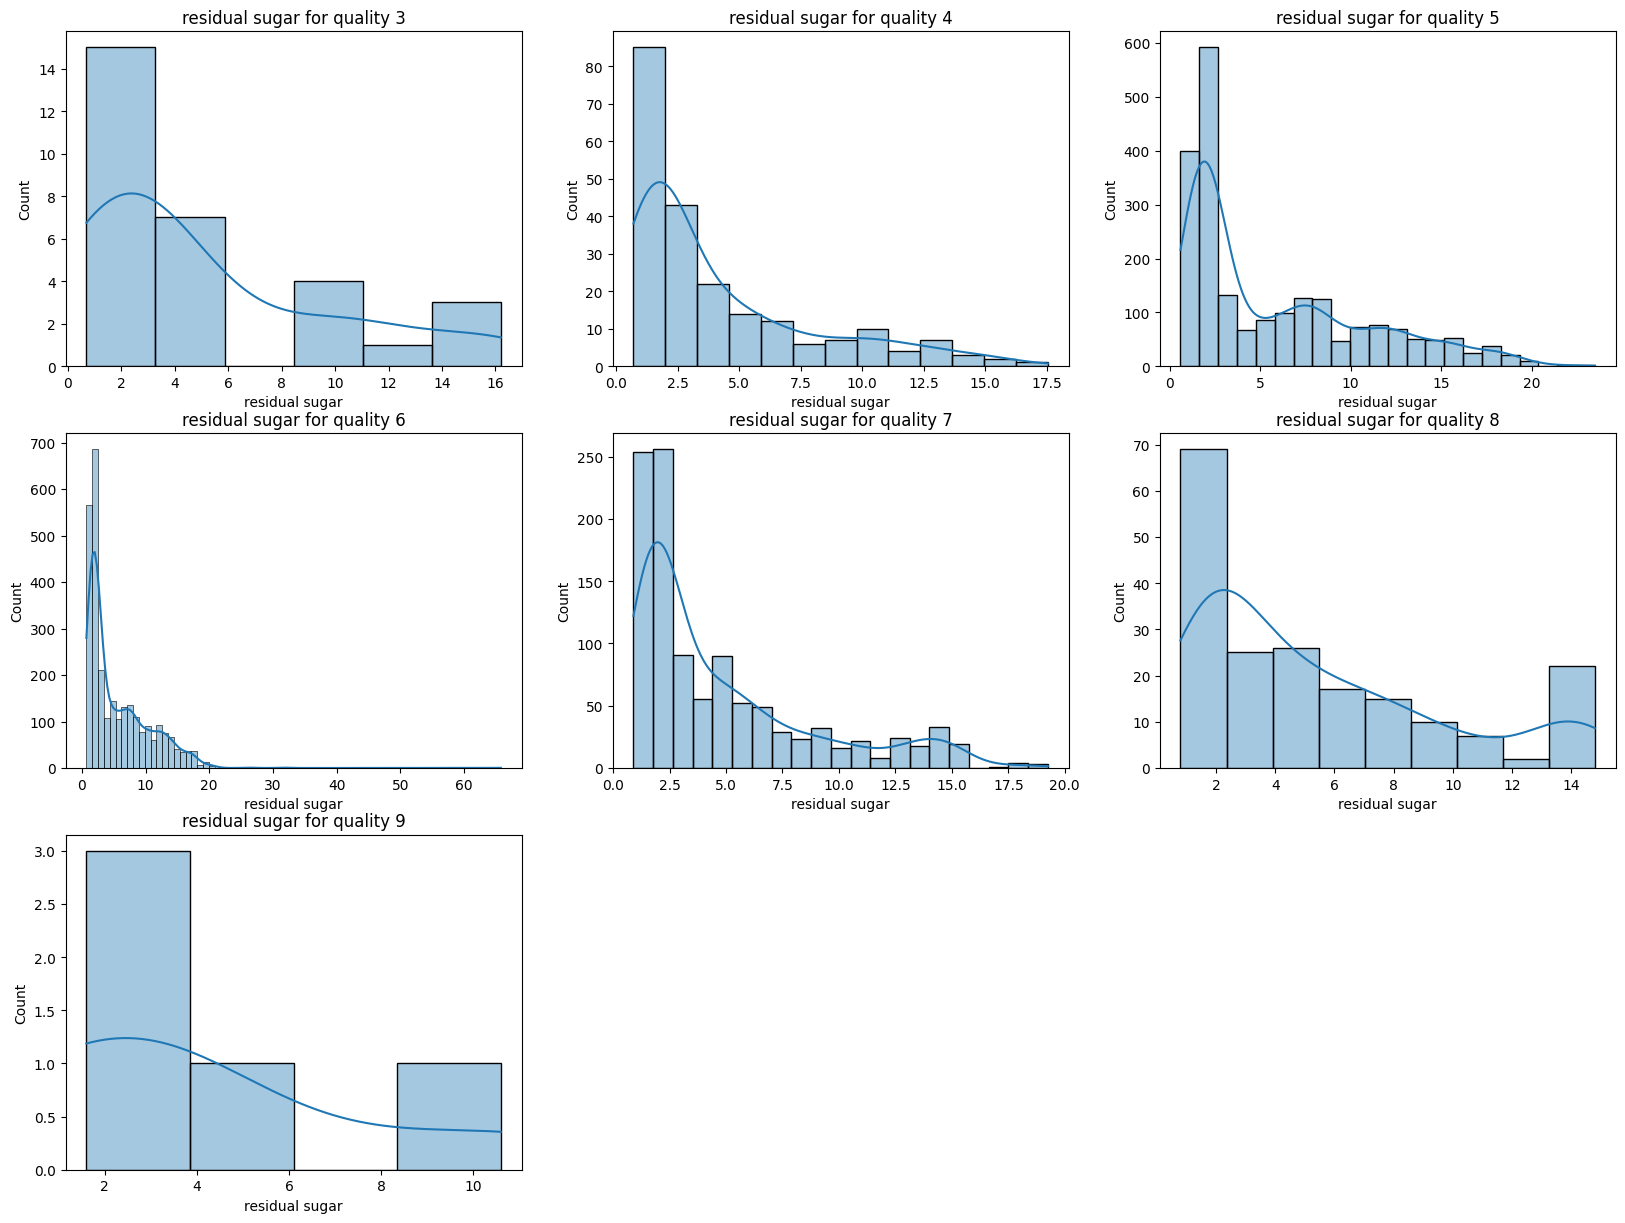

In [39]:
fig = plt.figure(figsize=(20,20))

for i in range(3, 10):
    ax = fig.add_subplot(4,3,i+1)
    sns.histplot(data=df[df['quality']==i], x='residual sugar', ax=ax, kde=True, alpha=0.4)
    ax.set_title('residual sugar for quality {}'.format(i))

plt.show()

3.3 Explore relationship between various columns

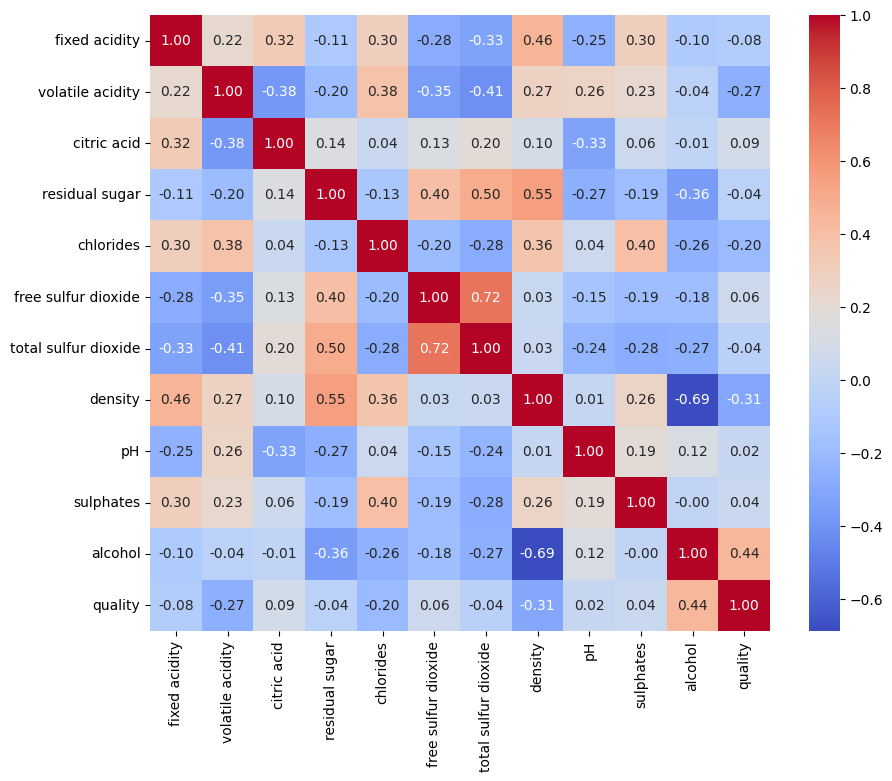

In [12]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create the heatmap
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm',annot=True, fmt='.2f')
plt.show()


In the heapmap, we can see that:

Quality has moderate positive correlation with alcohol (0.44) and weak positive correlation with citric acid (0.09) and sulphates (0.04).

Quality has moderate negative correlation with volatile acidity (-0.27), chlorides (-0.20), and density (-0.31).

Fixed acidity has moderate positive correlation with citric acid (0.32).

Volatile acidity has moderate positive correlation with chlorides (0.38) and weak negative correlation with citric acid (-0.38).

Free sulfur dioxide has strong positive correlation with total sulfur dioxide (0.72).

Density has strong positive correlation with residual sugar (0.55) and moderate positive correlation with chlorides (0.36).

pH does not show strong correlation with any of the predictor variables or with quality.

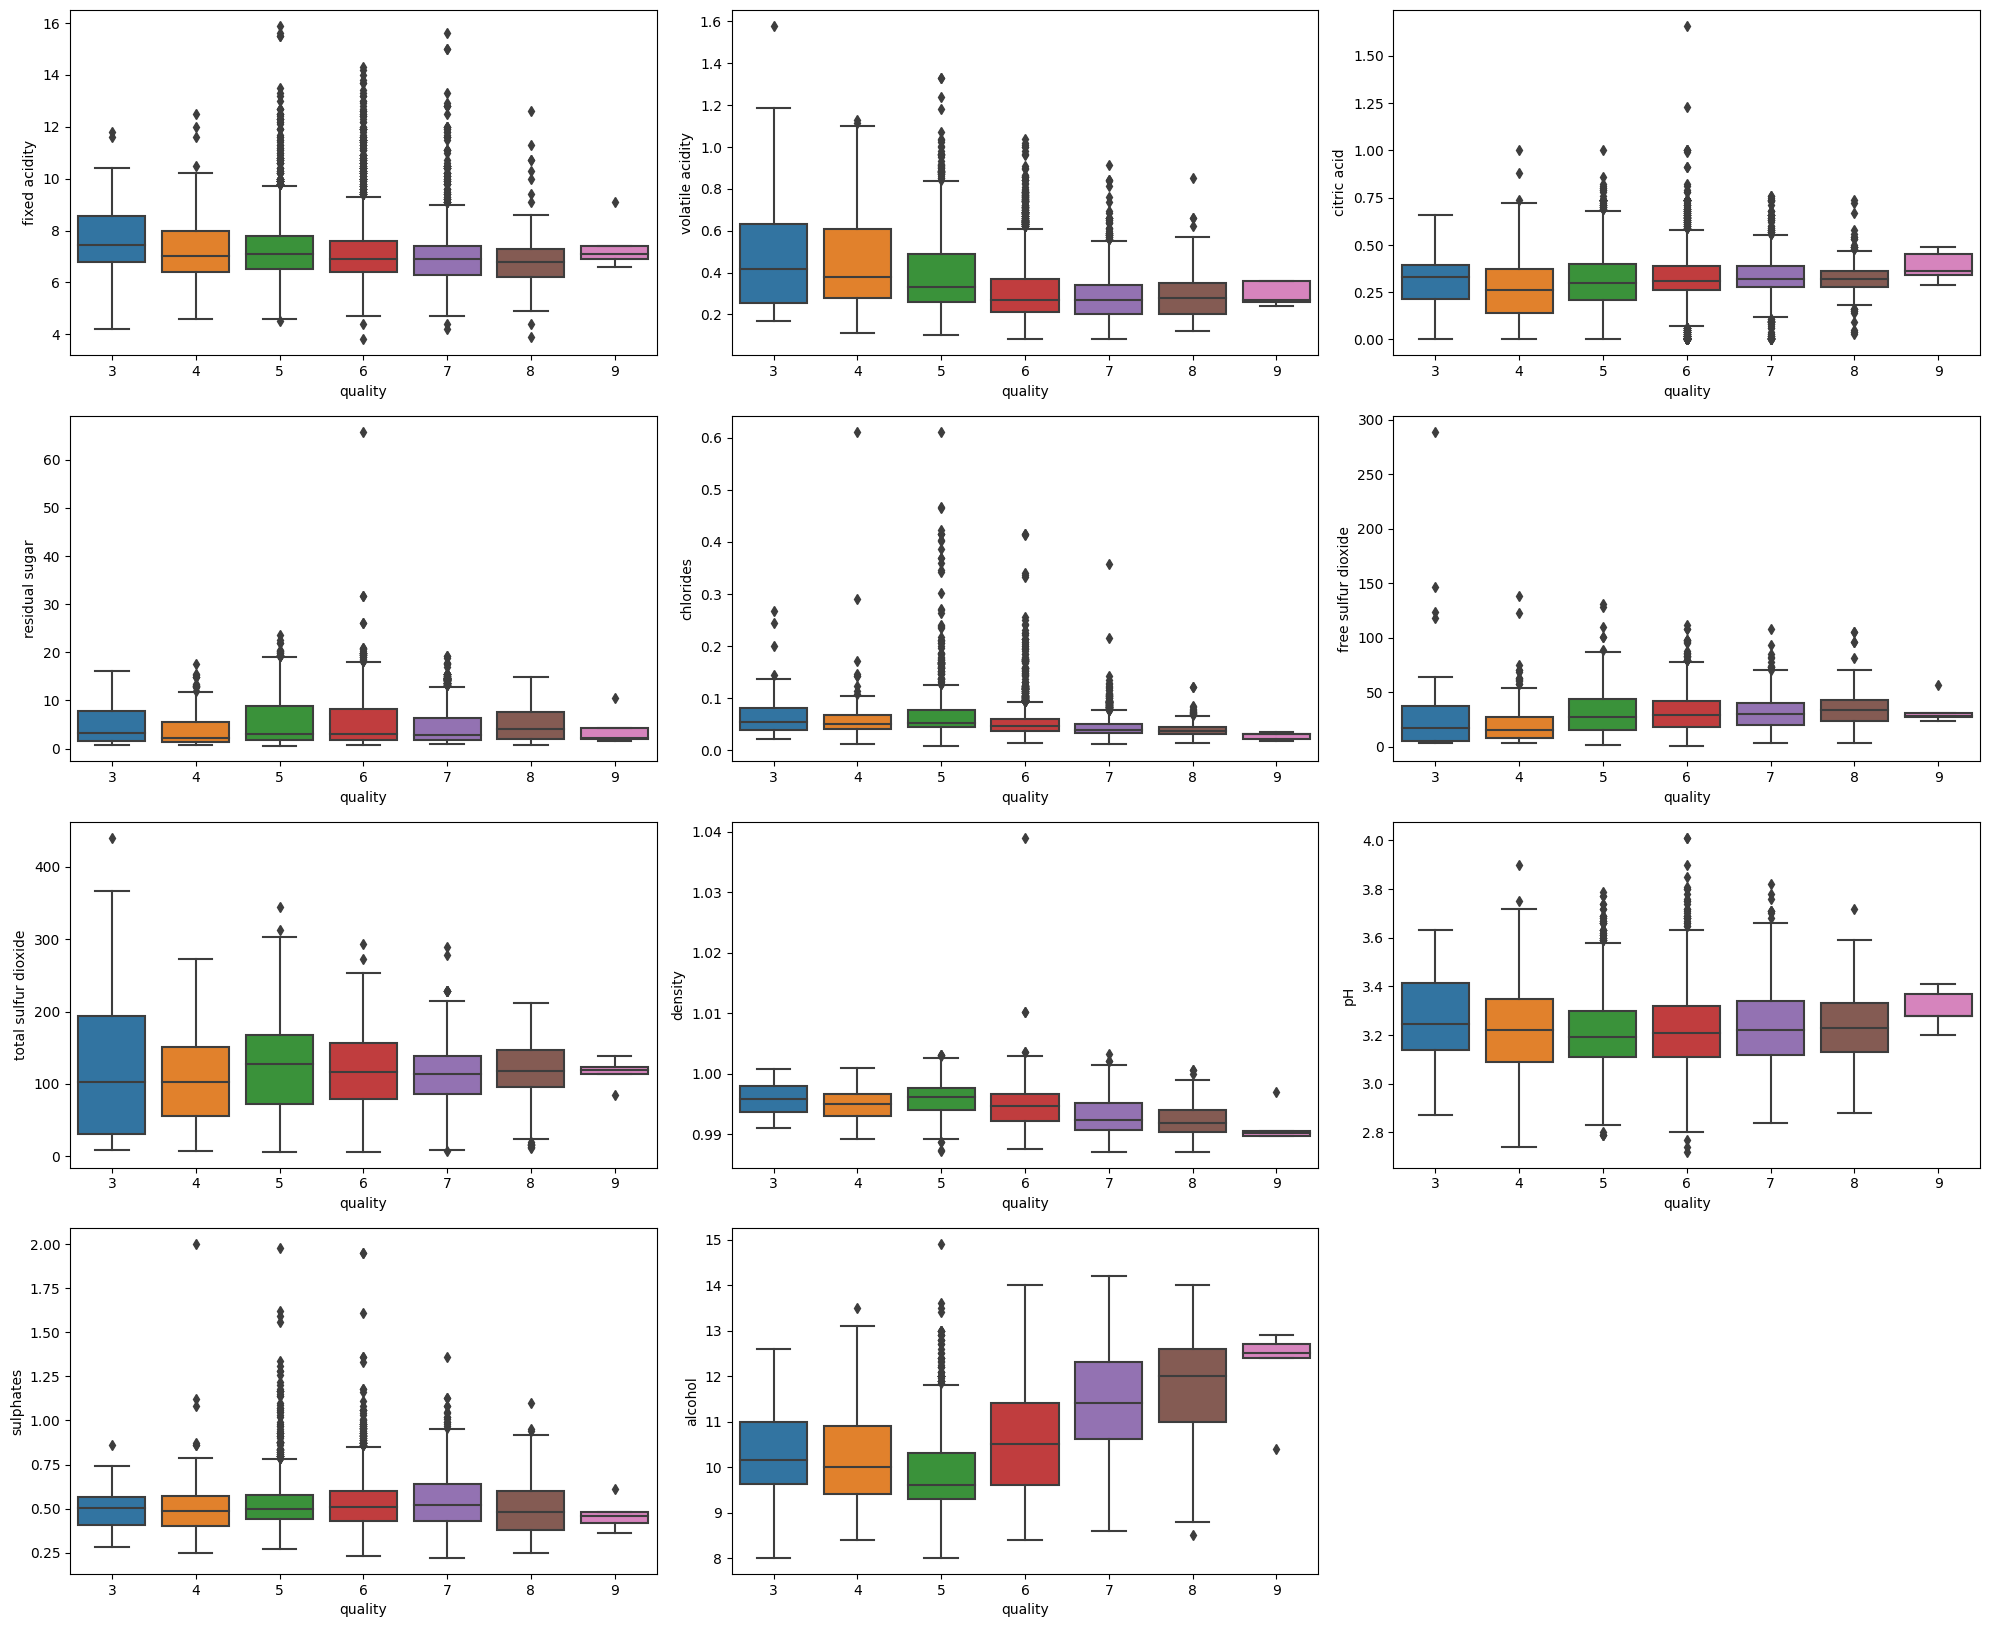

In [ ]:
plt.figure(figsize=(20,20))
for i in range(11):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x = 'quality', y = column[i], data = df)
    plt.ylabel(column[i])
plt.tight_layout()

In the boxplot, we can see that:

The quality of wine is positively correlated with citric acid, free sulfur dioxide and alocohol.


The quality of wine was negatively correlated with fixed acidity, volatile acidity, chlorides and density.

The quality of wine was not correlated with residual sugar, total sulfur dioxide, pH and sulphates.

3.4 Make a note of interesting insights from the exploratory analysis

In [24]:
print('fixed acidity:', df['fixed acidity'].min(), df['fixed acidity'].max(), df['fixed acidity'].mean())
print('voloatile acidity:', df['volatile acidity'].min(), df['volatile acidity'].max(), df['volatile acidity'].mean())
print('citric acid:', df['citric acid'].min(), df['citric acid'].max(), df['citric acid'].mean())
print('residual sugar:', df['residual sugar'].min(), df['residual sugar'].max(), df['residual sugar'].mean())
print('chlorides:', df['chlorides'].min(), df['chlorides'].max(), df['chlorides'].mean())
print('free sulfur dioxide:', df['free sulfur dioxide'].min(), df['free sulfur dioxide'].max(), df['free sulfur dioxide'].mean())
print('total sulfur dioxide:', df['total sulfur dioxide'].min(), df['total sulfur dioxide'].max(), df['total sulfur dioxide'].mean())
print('density:', df['density'].min(), df['density'].max(), df['density'].mean())
print('pH:', df['pH'].min(), df['pH'].max(), df['pH'].mean())
print('sulphates:', df['sulphates'].min(), df['sulphates'].max(), df['sulphates'].mean())
print('alcohol:', df['alcohol'].min(), df['alcohol'].max(), df['alcohol'].mean())

fixed acidity: 3.8 15.9 7.215307064799139
voloatile acidity: 0.08 1.58 0.3396659996921656
citric acid: 0.0 1.66 0.3186332153301524
residual sugar: 0.6 65.8 5.443235339387409
chlorides: 0.009 0.611 0.05603386178236109
free sulfur dioxide: 1.0 289.0 30.525319378174544
total sulfur dioxide: 6.0 440.0 115.7445744189626
density: 0.98711 1.03898 0.9946966338309989
pH: 2.72 4.01 3.2185008465445586
sulphates: 0.22 2.0 0.5312682776666154
alcohol: 8.0 14.9 10.491800831152839


Get all features' minimun, maximum and mean for wine quality prediction App UI use

In [28]:
# Check for class imbalance
print(df['quality'].value_counts())

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


It shows that the quality values in the data set are not balanced. Specifically, there are only a few samples with a quality of 3, 4, 8 and 9, while there are many samples with a quality of 5, 6, and 7. This is an example of class imbalance.

Step 4: Train and evaluate 4 machine learning models, tune hyperparameters and reduce the overfitting to improve the model.  Evaluate the performance of the models.

In [27]:
from sklearn.model_selection import train_test_split

# Split into X (features) and y (target)
X = df.drop(columns=['type', 'quality'])
y = df['quality']

In [ ]:
pip install imbalanced-learn

In [29]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=4)
# transform the datatset
X_B, y_B = oversample.fit_resample(X, y)

Due to the data imbalanced issue on the quality feature, we will use Synthetic Minority Oversampling Technique(SMOTE) to solve the data imbalance issue. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model.

In [32]:
print(X_B.shape, y_B.shape)
print(X.shape, y.shape)

# display new quality distribution
print(y_B.value_counts())


(19852, 11) (19852,)
(6497, 11) (6497,)
quality
5    2836
6    2836
7    2836
4    2836
8    2836
3    2836
9    2836
Name: count, dtype: int64


Now we can see the each class of quality has the same sample sizes.

 In the wine dataset, the 'alcohol' feature has a range of values from 8.0 to 14.9, while the 'total sulfur dioxide' feature has a range of values from 6.0 to 440.0. If we use these features without scaling, the algorithm may give more importance to the 'total sulfur dioxide' feature, simply because it has larger values, even though 'alcohol' may be more important in determining wine quality. So we need to scale the features so that they have a uniform range.

In [16]:
from sklearn.preprocessing import StandardScaler

def normalize(x_train, x_test):
  scaler = StandardScaler()
  x_train_scaled = scaler.fit_transform(x_train)
  x_test_scaled = scaler.transform(x_test)
  return x_train_scaled, x_test_scaled

In [ ]:
pip install tabulate

In [18]:
from sklearn.model_selection import train_test_split
from tabulate import tabulate

def classify(model, X, y, X_B, y_B, option = 0):
  x_train_iB, x_test_iB, y_train_iB, y_test_iB = train_test_split(X, y, test_size=0.2, random_state=42)
  x_train_B, x_test_B, y_train_B, y_test_B = train_test_split(X_B, y_B, test_size=0.2, random_state=42)

  normalize(x_train_iB, x_test_iB)
  normalize(x_train_B, x_test_B)
  
  results = []

  if option == 0:
      # train the model
      model.fit(x_train_B,y_train_B)
      res = model.score(x_test_B, y_test_B)*100
      headers = ["Training Data", "Testing Data", "Accuracy"]
      results.append(["Balanced", "Balanced", res])

  elif option == 1:
    # train the model
      model.fit(x_train_B,y_train_B)
      res = model.score(x_test_iB, y_test_iB)*100
      results.append(["Balanced", "Imbalanced", res])

  elif option == 2:
    # train the model
      model.fit(x_train_iB,y_train_iB)
      res = model.score(x_test_B, y_test_B)*100
      results.append(["Imbalanced", "Balanced", res])

  elif option == 3:
    # train the model
      model.fit(x_train_iB,y_train_iB)
      res = model.score(x_test_iB, y_test_iB)*100
      results.append(["Imalanced", "Imbalanced", res])
  
  return results

The classify function is for evaluating a machine learning model's performance on various combinations of balanced and imbalanced datasets. It divides the data into training and testing sets, normalizes the features, trains the model, and evaluates its accuracy.

I tested four different options to specify different training and testing data configurations:
- Training balanced data & Testing balanced data
- Training balanced data & Testing imbalanced data
- Training imbalanced data & Testing balanced data
- Training imbalanced data & Testing imbalanced data

In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

all_results_dt = []

for option in range(4):
    results = classify(model, X, y, X_B, y_B, option)
    all_results_dt.extend(results)

headers = ["Training Data", "Testing Data", "Accuracy"]
print(tabulate(all_results_dt, headers=headers))

Training Data    Testing Data      Accuracy
---------------  --------------  ----------
Balanced         Balanced           79.0481
Balanced         Imbalanced         90.0769
Imbalanced       Balanced           54.4195
Imalanced        Imbalanced         57.6154


Trained 4 different options of Decision Tree Classifier and check each of model performance across different data configurations. It iterates through four options, each representing a distinct training and testing dataset combination. I listed all 4 optins in a table for better comparision. From the table, we can see training on balanced data with imbalanced data has the highest accruacy of 90%, following by training on balanced data with balanced data 79%. We can clearly see that training on imbalanced data, the accracy is low due to the data imbalance issue.

In [20]:
from sklearn.ensemble import RandomForestClassifier

# train RandomForestClassifier with hyperparameter
model = RandomForestClassifier(n_estimators=500, random_state=42)

all_results_rf = []

for option in range(4):
    results = classify(model, X, y, X_B, y_B, option)
    all_results_rf.extend(results)

headers = ["Training Data", "Testing Data", "Accuracy"]
print(tabulate(all_results_rf, headers=headers))

Training Data    Testing Data      Accuracy
---------------  --------------  ----------
Balanced         Balanced           86.9302
Balanced         Imbalanced         92.2308
Imbalanced       Balanced           51.6998
Imalanced        Imbalanced         66.1538


Trained 4 different options of Random Forest Classifierand with hyperparameters. From the table, we can see training on balanced data with imbalanced data has the highest accruacy of 92%, following by training on balanced data with balanced data 87%. Same as Desiciosn Tree Classifier, we can clearly see that training on imbalanced data, the accracy is low due to the data imbalance issue.

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

# train Gradient Boosting Classifier with hyperparameter
model = GradientBoostingClassifier(n_estimators=500, random_state=42)

all_results_gbc = []

for option in range(4):
    results = classify(model, X, y, X_B, y_B, option)
    all_results_gbc.extend(results)

headers = ["Training Data", "Testing Data", "Accuracy"]
print(tabulate(all_results_gbc, headers=headers))

Training Data    Testing Data      Accuracy
---------------  --------------  ----------
Balanced         Balanced           80.1561
Balanced         Imbalanced         73.8462
Imbalanced       Balanced           43.3644
Imalanced        Imbalanced         59


Trained 4 different options of Gradient Boosting Classifier with hyperparameters. From the table, we can see training on balanced data with balanced data has the highest accruacy of 80%, following by training on balanced data with imbalanced data 73%.

In [23]:
from sklearn.svm import SVC

# train SVM classifier with hyperparameter
model = SVC(kernel='rbf', C=1, gamma='auto', random_state=42)

all_results_svc = []

for option in range(4):
    results = classify(model, X, y, X_B, y_B, option)
    all_results_svc.extend(results)

headers = ["Training Data", "Testing Data", "Accuracy"]
print(tabulate(all_results_svc, headers=headers))

Training Data    Testing Data      Accuracy
---------------  --------------  ----------
Balanced         Balanced           65.3236
Balanced         Imbalanced         43.6154
Imbalanced       Balanced           23.8479
Imalanced        Imbalanced         55.0769


Trained 4 different options of Support Vector Classifier with hyperparameters. From the table, we can see training on balanced data with balanced data has the highest accruacy of 65%, following by training on balanced data with imbalanced data 43%.

Summary of ML models training and evaluaction:

The Random Forest Classifier has the accuracy score of 92%(training on balanced data with imbalanced data) followed by Decision Tree with 90%(training on balanced data with imbalanced data) and Gradient Boosting Classifier(training on balanced data with balanced data) with 80% accuracy and SVM classifier(training on balanced data with balanced data) with 65% accuracy. 

Their accuracy scores of Random Forest Classifier is higher than others maybe because of less overfitting problems.
However, it is difficult to make a definitive statement about which model is better based solely on their accuracy scores.

Now we selected the Random Forest Classification ML algorithm (training on balanced data with imbalanced data) for our wine quality prediction App. See Github repo for the seperate folder for wine quality prediction Streamlit app.

Step 5: Summarize your inferences and write a conclusion

5.1 Write a summary of what you’ve learned from the analysis, include interesting insights and graphs from previous sections

Here are some interesting insights from the analysis:

1. The majority of the wine samples are of normal quality, followed by good quality, and a small portion of bad quality.

2. The quality of wine is positively correlated with the alcohol content, while it is negatively correlated with the volatile acidity and density.

3. The most important features for predicting the quality of wine are volatile acidity, residual sugar, free sulfur dioxide, total sulfur dioxide and alcohol.

5.2 Share ideas for future work 

1. Investigating the effect of different features on wine quality

The current analysis has focused on using all available features to predict wine quality. However, it would be interesting to investigate the effect of individual features on wine quality. For example, it may be useful to explore how pH, alcohol content, and citric acid levels individually contribute to the quality of the wine.

2. Exploring other data sources

In addition to the wine quality dataset used in this analysis, there are many other datasets on wine-related information. It would be interesting to explore these datasets and see if they can be used to build models that can predict other aspects of wine such as taste, aroma, and price.

3. Comparing with other models

While this analysis has focused on three different classifiers, there are many other machine learning models that could be tested on this dataset. It would be useful to compare the performance of other models, such as deep learning models, to the models used in this analysis.

4. Fine-tuning the models

Fine-tuning the models by optimizing hyperparameters can often improve their performance. In this analysis, most of hyperparameters we used is default. It would be interesting to fine-tune the hyperparameters of the models and see if they can improve the performance.
